In [26]:
import os, json


path = "../data/cuts/"
cuts = [(vid+'/'+cut) for vid in os.listdir(path) for cut in os.listdir(path + vid) if cut.endswith("_signer.json")]

scores = []
for idx, cut in enumerate(cuts):
    with open(path + cut) as datafile:
        line = ""
        while ']' not in line:
            line += datafile.readline()
        line = line[:-2] + '}'
        signer_data = json.loads(line)
    scores.append(signer_data["scores"])

<AxesSubplot:>

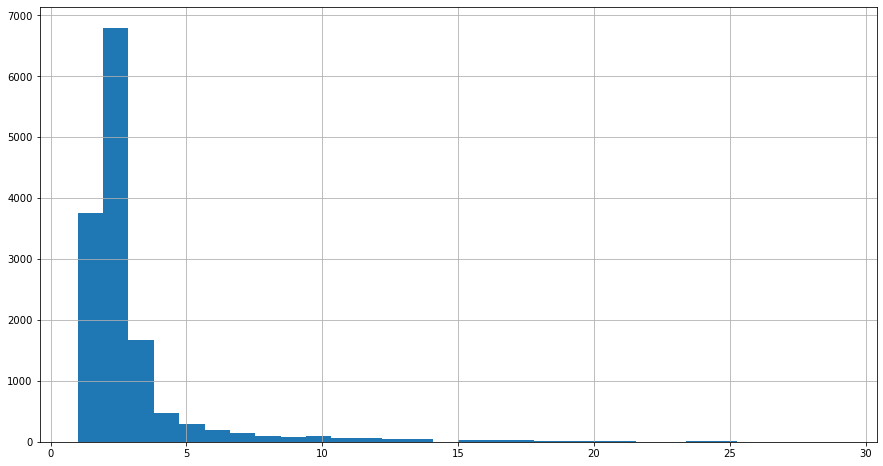

In [27]:
import pandas as pd

scores_s = pd.Series(map(len, scores))
scores_s.hist(bins=30,figsize=(15,8))

<AxesSubplot:>

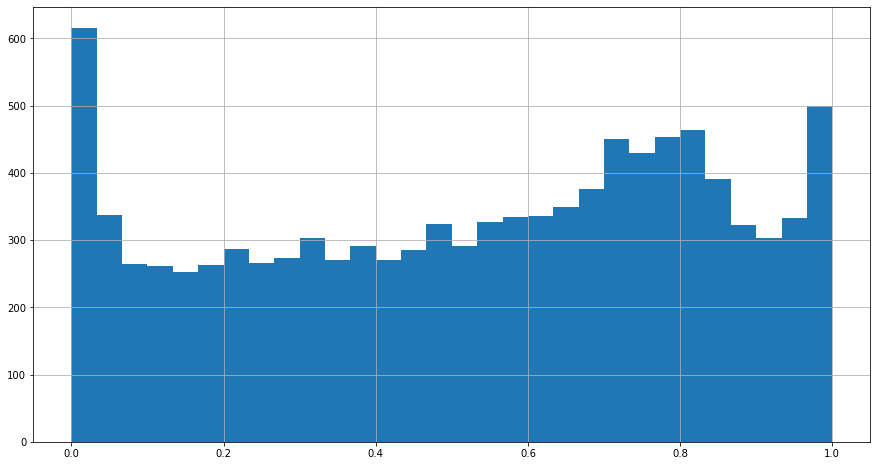

In [28]:
import pandas as pd
from IPython.display import display


def get_score(scores):
    m1 = max(scores)
    scores = [x for x in scores if x != m1]
    return (m1 - max(scores)) / m1

scores_s = pd.Series(map(get_score, filter(lambda s: len(s) >= 2, scores)))
display(scores_s.hist(bins=30,figsize=(15,8)))

<AxesSubplot:>

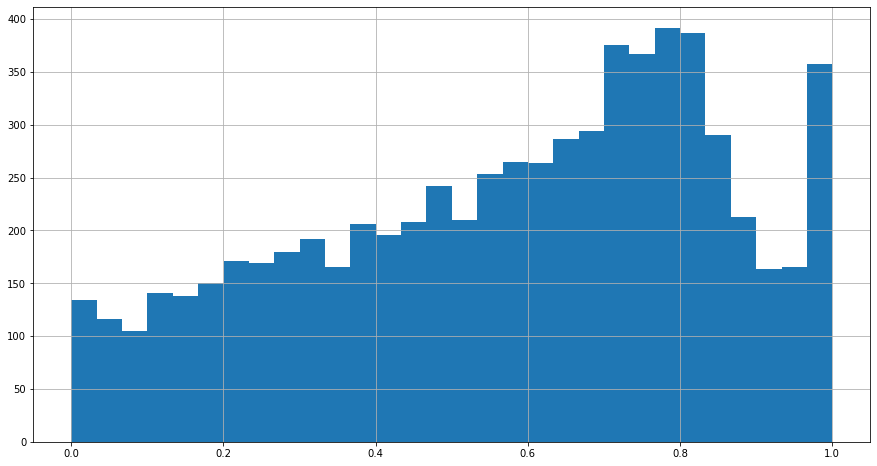

In [29]:
scores_2s_s = pd.Series(map(get_score, filter(lambda s: len(s) == 2, scores)))
display(scores_2s_s.hist(bins=30,figsize=(15,8)))

<AxesSubplot:>

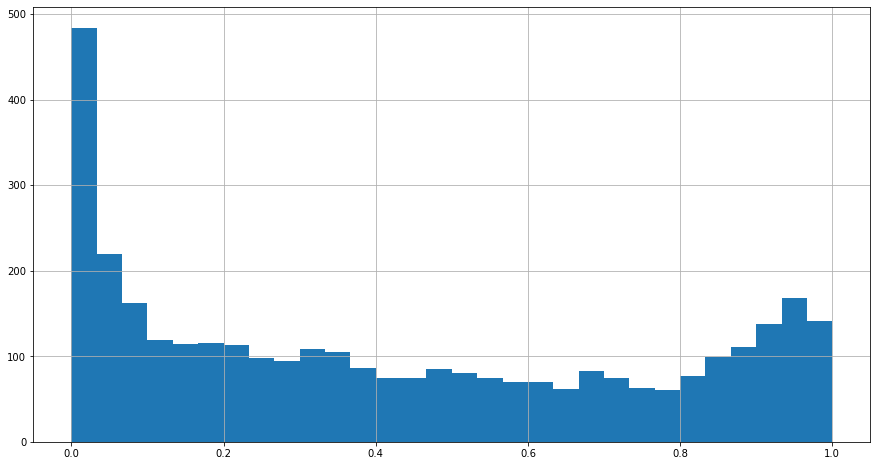

In [30]:
scores_ms_2 = pd.Series(map(get_score, filter(lambda s: len(s) > 2, scores)))
display(scores_ms_2.hist(bins=30,figsize=(15,8)))